In [2]:
!pip install datasets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 510.5/510.5 kB 10.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 17.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 21.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 17.8 MB/s eta 0:00:00


# Working with images

## Data

In [3]:
# load up a dataset of animals (cf. )
from datasets import load_dataset
dataset = load_dataset("Fiacre/test-animal-poses-controlnet-dataset")

Generating train split:   0%|          | 0/21 [00:00<?, ? examples/s]

In [16]:
dataset["train"][0]

{'original_image': <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=512x512>,
 'conditioning_image': <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=512x512>,
 'overlaid': <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=512x512>,
 'caption': 'Photo of a lion hunting'}

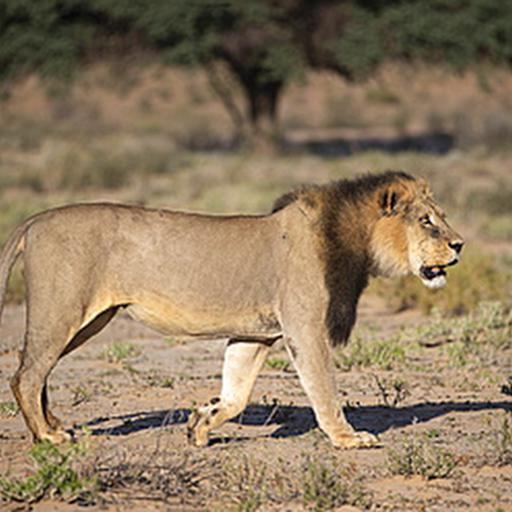

In [17]:
dataset["train"][0]["original_image"]

## Model

In [14]:
from transformers import CLIPModel, CLIPProcessor

In [15]:
# Load the model
model = CLIPModel.from_pretrained("openai/clip-vit-base-patch32")
# Load the processor
processor = CLIPProcessor.from_pretrained("openai/clip-vit-base-patch32")

preprocessor_config.json:   0%|          | 0.00/316 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/592 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/862k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.22M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/389 [00:00<?, ?B/s]

In [24]:
# Preprocess the image using the processor
inputs = processor(images=dataset["train"][0]["original_image"], return_tensors="pt", padding=True)
inputs, inputs["pixel_values"].shape # 3-channel image, resized to 224x224

({'pixel_values': tensor([[[[-1.0623, -1.0915, -1.0623,  ..., -0.9164, -0.8726, -0.8580],
           [-1.2083, -1.2229, -1.1499,  ..., -0.9018, -0.8288, -0.8288],
           [-1.2959, -1.3397, -1.2521,  ..., -0.9893, -0.9310, -0.8872],
           ...,
           [ 0.3683,  0.2077,  0.2661,  ...,  1.0982,  1.0398,  1.0690],
           [ 0.5143,  0.7771,  0.7625,  ...,  1.0398,  0.9814,  1.1274],
           [ 0.7333,  0.7041,  0.5143,  ...,  0.9814,  1.0398,  0.9230]],
 
          [[-0.9717, -1.0017, -0.9717,  ..., -0.8066, -0.7616, -0.7466],
           [-1.1218, -1.1368, -1.0467,  ..., -0.7916, -0.7166, -0.7166],
           [-1.2118, -1.2568, -1.1668,  ..., -0.8816, -0.8216, -0.7766],
           ...,
           [-0.0112, -0.1763, -0.1313,  ...,  0.6191,  0.5441,  0.5891],
           [ 0.1089,  0.3940,  0.3940,  ...,  0.6341,  0.5291,  0.6642],
           [ 0.3190,  0.3040,  0.1389,  ...,  0.7092,  0.6792,  0.5141]],
 
          [[-0.9399, -0.9683, -0.9541,  ..., -0.8261, -0.7834, -0.769

In [32]:
# Generate the image embedding
img_embedding = model.get_image_features(**inputs)
img_embedding, img_embedding.shape

(tensor([[-2.1679e-01, -9.6427e-02, -1.1514e-01, -6.4811e-03,  1.5644e-01,
           7.6262e-02,  9.7685e-02,  5.2125e-01,  6.5618e-01,  2.2116e-01,
           4.2147e-02, -1.9123e-01,  6.8335e-01, -4.6330e-01,  6.9274e-02,
          -2.6653e-01,  3.8217e-01,  3.8571e-01,  4.2604e-02,  3.6179e-01,
          -4.5211e-01,  4.2807e-01,  4.4155e-01, -3.2854e-01, -2.9597e-01,
           1.6841e-01, -1.8542e-01, -6.9935e-02, -2.4187e-02, -4.6655e-01,
           1.1362e-01, -2.5112e-01,  2.0327e-02,  8.2427e-04,  8.2685e-04,
          -7.1913e-02,  1.7498e-01,  7.9416e-01, -1.1567e-01,  1.5467e+00,
           5.5960e-02,  1.1552e-01,  3.5533e-01, -7.1399e-02, -1.8184e-01,
           2.8716e-01,  2.2555e-01,  4.0451e-01, -1.8728e-01, -3.6910e-01,
          -1.0861e-01,  4.5151e-01,  3.4147e-01, -1.2643e-01, -3.8354e-01,
           7.7784e-01,  5.6136e-01,  4.4119e-01,  2.7021e-02,  1.4462e-01,
           4.8285e-01,  3.1865e-02, -5.8731e-01,  2.1485e-01,  1.4903e-01,
          -4.0858e-01,  2

## Let's generalize!

In [115]:
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt

In [116]:
# Generate a dataframe with descriptions, images and their embeddings
df = pd.DataFrame(dataset["train"][0:50])
df

,original_image,conditioning_image,overlaid,caption
0,<PIL.JpegImagePlugin.JpegImageFile image mode=...,<PIL.JpegImagePlugin.JpegImageFile image mode=...,<PIL.JpegImagePlugin.JpegImageFile image mode=...,Photo of a lion hunting
1,<PIL.JpegImagePlugin.JpegImageFile image mode=...,<PIL.JpegImagePlugin.JpegImageFile image mode=...,<PIL.JpegImagePlugin.JpegImageFile image mode=...,Photo of a zebra galloping
2,<PIL.JpegImagePlugin.JpegImageFile image mode=...,<PIL.JpegImagePlugin.JpegImageFile image mode=...,<PIL.JpegImagePlugin.JpegImageFile image mode=...,Photo of a zebra grazing
3,<PIL.JpegImagePlugin.JpegImageFile image mode=...,<PIL.JpegImagePlugin.JpegImageFile image mode=...,<PIL.JpegImagePlugin.JpegImageFile image mode=...,Photo of a fox hunting
4,<PIL.JpegImagePlugin.JpegImageFile image mode=...,<PIL.JpegImagePlugin.JpegImageFile image mode=...,<PIL.JpegImagePlugin.JpegImageFile image mode=...,Photo of a fox yipping
5,<PIL.JpegImagePlugin.JpegImageFile image mode=...,<PIL.JpegImagePlugin.JpegImageFile image mode=...,<PIL.JpegImagePlugin.JpegImageFile image mode=...,Photo of a rabbit sprinting
6,<PIL.JpegImagePlugin.JpegImageFile image mode=...,<PIL.JpegImagePlugin.JpegImageFile image mode=...,<PIL.JpegImagePlugin.JpegImageFile image mode=...,Photo of a wolf prowling
7,<PIL.JpegImagePlugin.JpegImageFile image mode=...,<PIL.JpegImagePlugin.JpegImageFile image mode=...,<PIL.JpegImagePlugin.JpegImageFile image mode=...,Photo of a wolf licking
8,<PIL.JpegImagePlugin.JpegImageFile image mode=...,<PIL.JpegImagePlugin.JpegImageFile image mode=...,<PIL.JpegImagePlugin.JpegImageFile image mode=...,Photo of a horse galloping
9,<PIL.JpegImagePlugin.JpegImageFile image mode=...,<PIL.JpegImagePlugin.JpegImageFile image mode=...,<PIL.JpegImagePlugin.JpegImageFile image mode=...,Photo of a horse trotting


In [117]:
# Compute the embeddings for each image
preprocessed = processor(images=list(df.original_image.values), return_tensors="pt", padding=True)

In [118]:
embs = model.get_image_features(**preprocessed)

In [119]:
embs.shape

torch.Size([21, 512])

In [120]:
df["embeddings"] = embs.tolist()

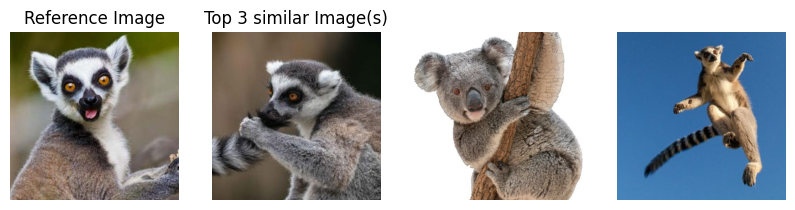

In [125]:
# Reference image ID
ref_ID = 17

# Number of similar images
N_similar = 3

# Selected a row
selected_row = df.loc[ref_ID, 'embeddings']

# Reshape the selected row to 2D as cosine_similarity expects 2D arrays
selected_row_2d = np.array(selected_row).reshape(1, -1)

# Compute the cosine similarity between the selected row and all other rows
df["similarity"] = df['embeddings'].apply(lambda row: cosine_similarity(selected_row_2d, np.array(row).reshape(1, -1))[0][0])


# Select the reference image and the two most similar images
images = [df.loc[ref_ID, 'original_image']] + df.nlargest(N_similar+1, 'similarity')['original_image'][1:].tolist()

# Create a new figure
plt.figure(figsize=(10, 10))

# Loop over the images and display them
for i, image in enumerate(images, 1):
    plt.subplot(1, N_similar+1, i)
    plt.imshow(image)
    plt.axis('off')
    if i == 1:
        plt.title('Reference Image')
    elif i == round(N_similar / 2 + 1):
        plt.title('Top {} similar Image(s)'.format(N_similar))
    else:
        None


plt.show()